In [87]:
# import os
# import csv

# # Define the folder path
# folder_path = r'C:\Users\clint\Desktop\Trucks\September 10\Code\Data\Analytic\processed_txt'

# # List all text files in the folder
# text_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# # Open a CSV file for writing
# with open('industrial_matches.csv', 'w', newline='', encoding='utf-8') as csvfile:
#     fieldnames = ['file_name', 'Industrial_Match']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
#     # Write the header row
#     writer.writeheader()
    
#     # Process all text files
#     for file_name in text_files:
#         file_path = os.path.join(folder_path, file_name)
        
#         with open(file_path, 'r', encoding='utf-8') as file:
#             content = file.read()
            
#             # Find all occurrences of the word "industrial"
#             index = content.lower().find('industrial')
#             while index != -1:
#                 start = max(0, index - 250)
#                 end = min(len(content), index + 250)
#                 snippet = content[start:end]
                
#                 # Write the match to the CSV file
#                 writer.writerow({'file_name': file_name, 'Industrial_Match': snippet})
                
#                 # Find the next occurrence
#                 index = content.lower().find('industrial', index + 1)

In [88]:
# import os
# from collections import Counter
# import re
# import nltk
# import pandas as pd
# from nltk.corpus import stopwords

# # Download stopwords if not already downloaded
# nltk.download('stopwords')

# # Define the directory path
# directory_path = r'C:\Users\clint\Desktop\Trucks\September 10\Code\Data\Analytic\processed_txt'

# # Initialize a Counter to count word frequencies
# word_counter = Counter()

# # Get the set of English stopwords
# stop_words = set(stopwords.words('english'))

# # List all text files in the directory
# for filename in os.listdir(directory_path):
#     if filename.endswith('.txt'):
#         file_path = os.path.join(directory_path, filename)
        
#         # Read the content of each text file
#         with open(file_path, 'r', encoding='utf-8') as file:
#             content = file.read()
            
#             # Tokenize the text into words
#             words = re.findall(r'\b\w+\b', content.lower())
            
#             # Remove stopwords
#             filtered_words = [word for word in words if word not in stop_words]
            
#             # Update the word counter
#             word_counter.update(filtered_words)

# # Find the most common words
# most_common_words = word_counter.most_common()

# # Create a DataFrame from the most common words and their frequencies
# df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# df_all=df
# df_all.to_csv('df_all.csv', index=False)


In [89]:
# import pandas as pd
# from collections import Counter
# import re
# import nltk
# from nltk.corpus import stopwords

# # Download the stop words list
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# # Read the CSV file
# df = pd.read_csv('industrial_matches.csv')

# # Extract the "Industrial_Match" column
# industrial_match_strings = df["Industrial_Match"].dropna().tolist()

# # Tokenize the strings into words and filter out stop words
# words = []
# for string in industrial_match_strings:
#     words.extend([word for word in re.findall(r'\b\w+\b', string.lower()) if word not in stop_words])

# # Count the frequency of each word
# word_counts = Counter(words)

# # Get the most common words
# most_common_words = word_counts.most_common()  # Change the number to get more or fewer common words

# # Create a DataFrame from the most common words
# common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
# ind_df = common_words_df
# ind_df
# ind_df.to_csv('ind_df.csv', index=False)

In [90]:
# import os
# import glob

# # Define the directory path
# directory_path = r'C:\Users\clint\Desktop\Trucks\September 10\Code\Data\Analytic\processed_txt'

# # Use glob to find all text files in the directory
# text_files = glob.glob(os.path.join(directory_path, '*.txt'))

# # Initialize a counter for the total word count
# total_word_count = 0

# # Loop through each file
# for file_path in text_files:
#     with open(file_path, 'r', encoding='utf-8') as file:
#         content = file.read()
#         # Count the words in the file
#         words = content.split()
#         total_word_count += len(words)

# # Print the total word count
# print(f'Total word count: {total_word_count}')

In [91]:
 import pandas as pd
# Assuming df_all and ind_df are your DataFrames
# Merge the DataFrames on the 'Word' column
df_all = pd.read_csv('df_all.csv')
ind_df = pd.read_csv('ind_df.csv')

merged_df = pd.merge(df_all, ind_df, on='Word', how='outer', suffixes=('_df_all', '_ind_df'))

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)
columns_to_divide = ['Frequency_df_all', 'Frequency_ind_df']
merged_df[columns_to_divide] = merged_df[columns_to_divide].apply(lambda x: x / total_word_count)
merged_df


,Word,Frequency_df_all,Frequency_ind_df
0,0,8.819513e-05,7.350650e-06
1,00,1.814672e-05,8.841553e-07
2,000,7.663524e-06,4.028100e-07
3,0000,5.193463e-07,8.993557e-08
4,00000,1.494704e-07,2.280057e-08
...,...,...,...
2331831,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz...,5.066793e-08,5.066793e-09
2331832,0,1.430102e-05,5.953481e-08
2331833,0,1.430102e-05,5.066793e-09
2331834,0,2.482728e-07,5.953481e-08


In [92]:
# Calculate the difference in frequencies
merged_df['Frequency_Difference'] = merged_df['Frequency_df_all'] - merged_df['Frequency_ind_df']


In [93]:
merged_df

,Word,Frequency_df_all,Frequency_ind_df,Frequency_Difference
0,0,8.819513e-05,7.350650e-06,8.084448e-05
1,00,1.814672e-05,8.841553e-07,1.726256e-05
2,000,7.663524e-06,4.028100e-07,7.260714e-06
3,0000,5.193463e-07,8.993557e-08,4.294107e-07
4,00000,1.494704e-07,2.280057e-08,1.266698e-07
...,...,...,...,...
2331831,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz...,5.066793e-08,5.066793e-09,4.560113e-08
2331832,0,1.430102e-05,5.953481e-08,1.424149e-05
2331833,0,1.430102e-05,5.066793e-09,1.429596e-05
2331834,0,2.482728e-07,5.953481e-08,1.887380e-07


In [94]:
import pandas as pd

# Assuming merged_df is already defined
sorted_df = merged_df.sort_values(by="Frequency_df_all", ascending=False)  # Change ascending to False for descending order

# Display the sorted DataFrame
sorted_df

,Word,Frequency_df_all,Frequency_ind_df,Frequency_Difference
2152836,shall,0.016648,4.120911e-04,1.623553e-02
1507542,city,0.006086,1.369491e-04,5.948858e-03
1871596,may,0.004130,1.323332e-04,3.998086e-03
2045093,public,0.003323,8.542233e-05,3.237195e-03
2269475,use,0.002789,1.618866e-04,2.627558e-03
...,...,...,...,...
1847082,llitohloe,0.000000,1.266698e-09,-1.266698e-09
2114119,ronyms,0.000000,1.266698e-09,-1.266698e-09
2213466,tangib,0.000000,5.066793e-09,-5.066793e-09
1629322,emporarily,0.000000,1.266698e-09,-1.266698e-09


In [95]:
import pandas as pd

# Assuming sorted_df is your DataFrame
# Define a function to check if a value is a single character
def is_single_char(val):
    return isinstance(val, str) and len(val) == 1

# Iterate over each column and drop rows with single character entries
for col in sorted_df.columns:
    sorted_df = sorted_df[~sorted_df[col].apply(is_single_char)]

# Display the cleaned DataFrame
sorted_df

,Word,Frequency_df_all,Frequency_ind_df,Frequency_Difference
2152836,shall,0.016648,4.120911e-04,1.623553e-02
1507542,city,0.006086,1.369491e-04,5.948858e-03
1871596,may,0.004130,1.323332e-04,3.998086e-03
2045093,public,0.003323,8.542233e-05,3.237195e-03
2269475,use,0.002789,1.618866e-04,2.627558e-03
...,...,...,...,...
1847082,llitohloe,0.000000,1.266698e-09,-1.266698e-09
2114119,ronyms,0.000000,1.266698e-09,-1.266698e-09
2213466,tangib,0.000000,5.066793e-09,-5.066793e-09
1629322,emporarily,0.000000,1.266698e-09,-1.266698e-09


C:\Users\clint\AppData\Local\Temp\ipykernel_5316\88756529.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_df['Word'] = top_50_df['Word'].astype(str)


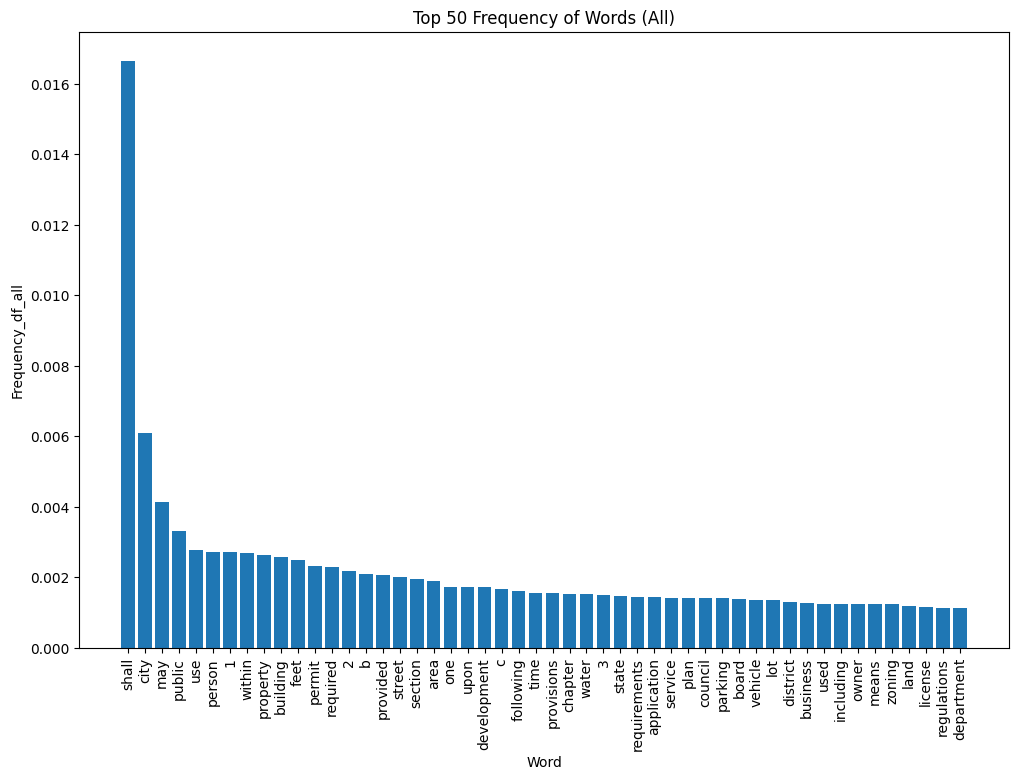

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
sorted_df = merged_df.sort_values(by="Frequency_df_all", ascending=False)  # Sort in descending order

# Select top 50 rows
top_50_df = sorted_df.head(50)

# Convert Word column to string
top_50_df['Word'] = top_50_df['Word'].astype(str)

# Plot Frequency_df_all against Word for top 50 rows
plt.figure(figsize=(12, 8))
plt.bar(top_50_df['Word'], top_50_df['Frequency_df_all'])
plt.xlabel('Word')
plt.ylabel('Frequency_df_all')
plt.title('Top 50 Frequency of Words (All)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\clint\AppData\Local\Temp\ipykernel_5316\612072417.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_df['Word'] = top_50_df['Word'].astype(str)


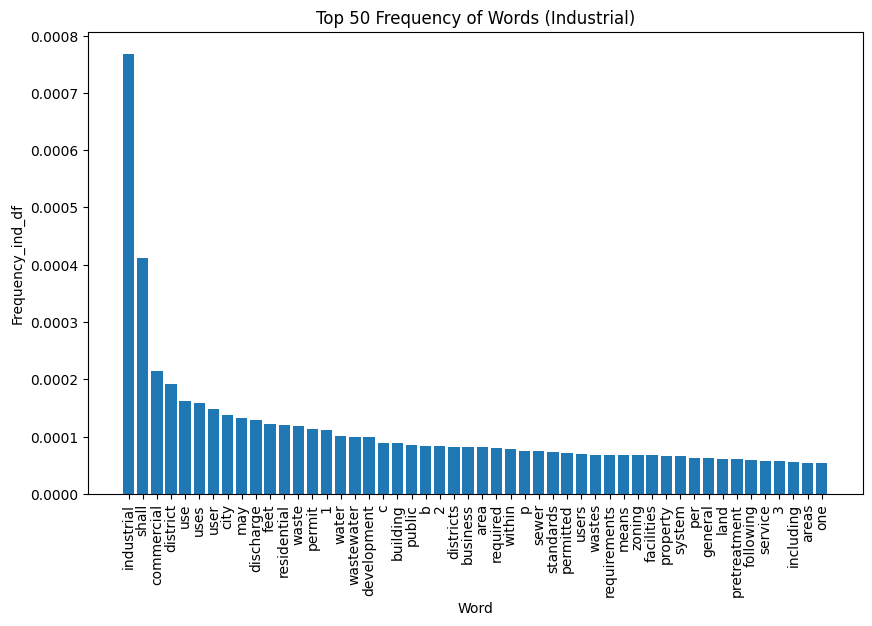

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
sorted_df = merged_df.sort_values(by="Frequency_ind_df", ascending=False)  # Sort in descending order

# Select top 50 rows
top_50_df = sorted_df.head(50)

# Convert Word column to string
top_50_df['Word'] = top_50_df['Word'].astype(str)

# Plot Frequency_ind_df against Word for top 50 rows
plt.figure(figsize=(10, 6))
plt.bar(top_50_df['Word'], top_50_df['Frequency_ind_df'])
plt.xlabel('Word')
plt.ylabel('Frequency_ind_df')
plt.title('Top 50 Frequency of Words (Industrial)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\clint\AppData\Local\Temp\ipykernel_5316\3147178089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_df['Word'] = top_50_df['Word'].astype(str)


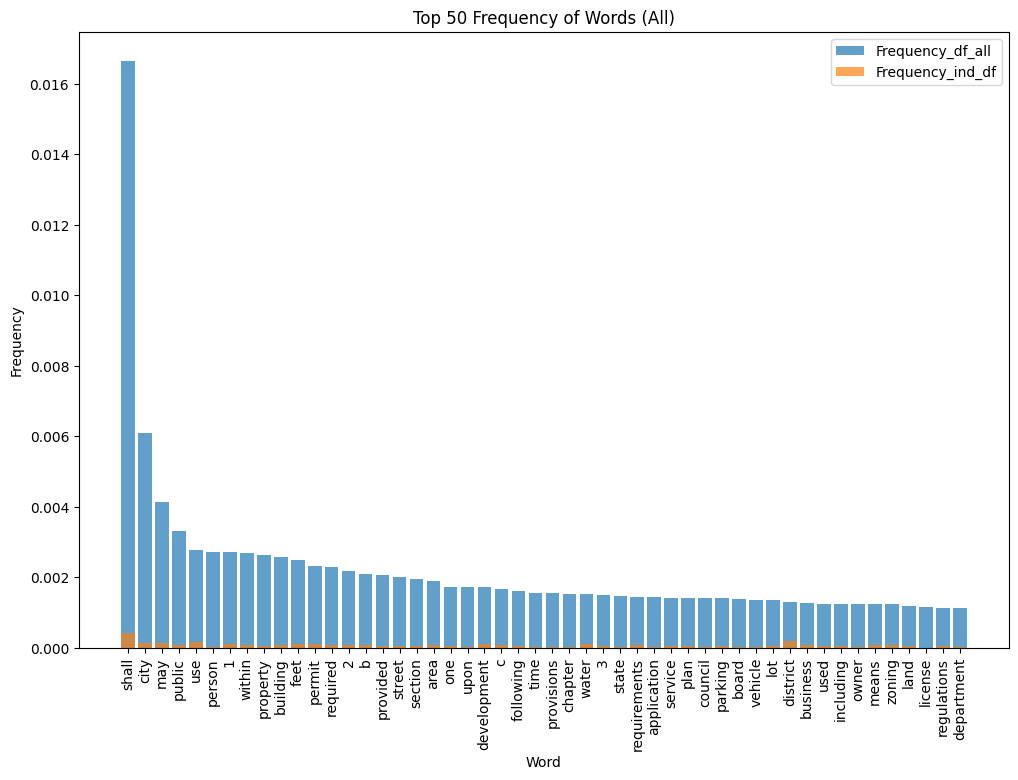

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
sorted_df = merged_df.sort_values(by="Frequency_df_all", ascending=False)  # Sort in descending order

# Select top 50 rows
top_50_df = sorted_df.head(50)

# Convert Word column to string
top_50_df['Word'] = top_50_df['Word'].astype(str)

# Plot Frequency_df_all and Frequency_ind_df against Word for top 50 rows
plt.figure(figsize=(12, 8))
plt.bar(top_50_df['Word'], top_50_df['Frequency_df_all'], label='Frequency_df_all', alpha=0.7)
plt.bar(top_50_df['Word'], top_50_df['Frequency_ind_df'], label='Frequency_ind_df', alpha=0.7)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Frequency of Words (All)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

In [99]:
sorted_df['Scaler'] = sorted_df['Frequency_df_all'] / sorted_df['Frequency_ind_df']
sorted_df
sorted_df['Scaled_Frequency_df_all'] = sorted_df['Frequency_df_all'] / 40.397923
sorted_df

,Word,Frequency_df_all,Frequency_ind_df,Frequency_Difference,Scaler,Scaled_Frequency_df_all
2152836,shall,0.016648,4.120911e-04,1.623553e-02,40.397923,0.000412
1507542,city,0.006086,1.369491e-04,5.948858e-03,44.438468,0.000151
1871596,may,0.004130,1.323332e-04,3.998086e-03,31.212260,0.000102
2045093,public,0.003323,8.542233e-05,3.237195e-03,38.896363,0.000082
2269475,use,0.002789,1.618866e-04,2.627558e-03,17.230857,0.000069
...,...,...,...,...,...,...
1847082,llitohloe,0.000000,1.266698e-09,-1.266698e-09,0.000000,0.000000
2114119,ronyms,0.000000,1.266698e-09,-1.266698e-09,0.000000,0.000000
2213466,tangib,0.000000,5.066793e-09,-5.066793e-09,0.000000,0.000000
1629322,emporarily,0.000000,1.266698e-09,-1.266698e-09,0.000000,0.000000


C:\Users\clint\AppData\Local\Temp\ipykernel_5316\785123114.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_df['Word'] = top_50_df['Word'].astype(str)


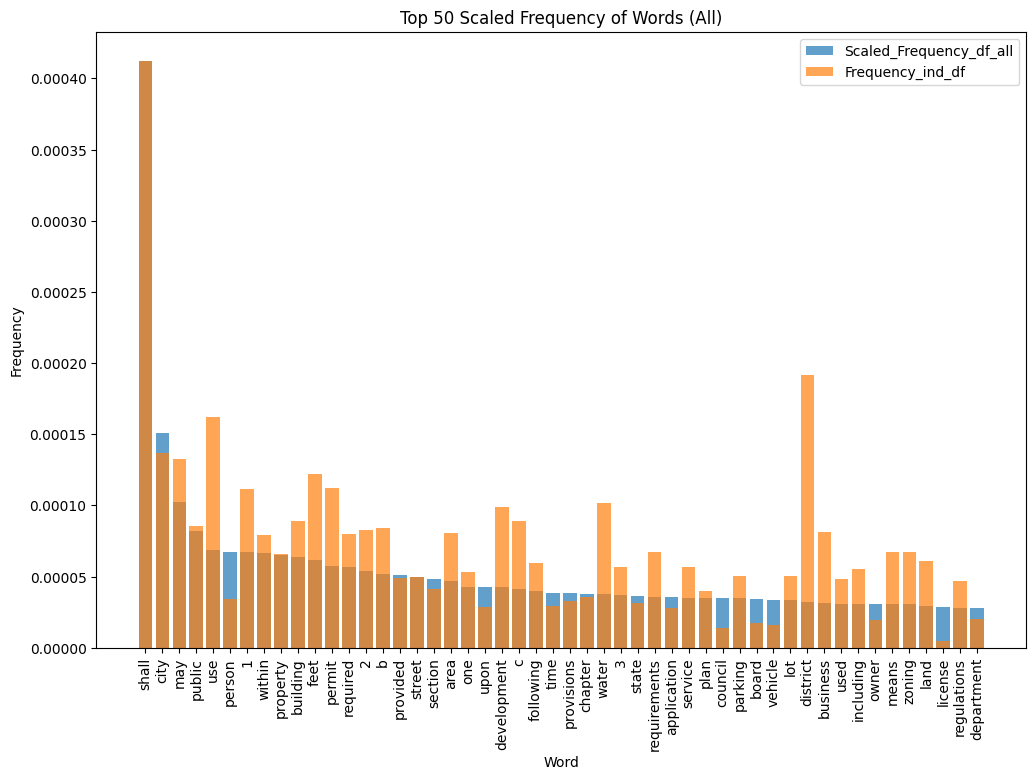

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
sorted_df = sorted_df.sort_values(by="Scaled_Frequency_df_all", ascending=False)  # Sort in descending order

# Select top 50 rows
top_50_df = sorted_df.head(50)

# Convert Word column to string
top_50_df['Word'] = top_50_df['Word'].astype(str)

# Plot Scaled_Frequency_df_all and Frequency_ind_df against Word for top 50 rows
plt.figure(figsize=(12, 8))
plt.bar(top_50_df['Word'], top_50_df['Scaled_Frequency_df_all'], label='Scaled_Frequency_df_all', alpha=0.7)
plt.bar(top_50_df['Word'], top_50_df['Frequency_ind_df'], label='Frequency_ind_df', alpha=0.7)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Scaled Frequency of Words (All)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

C:\Users\clint\AppData\Local\Temp\ipykernel_5316\1626166864.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_df['Word'] = top_50_df['Word'].astype(str)


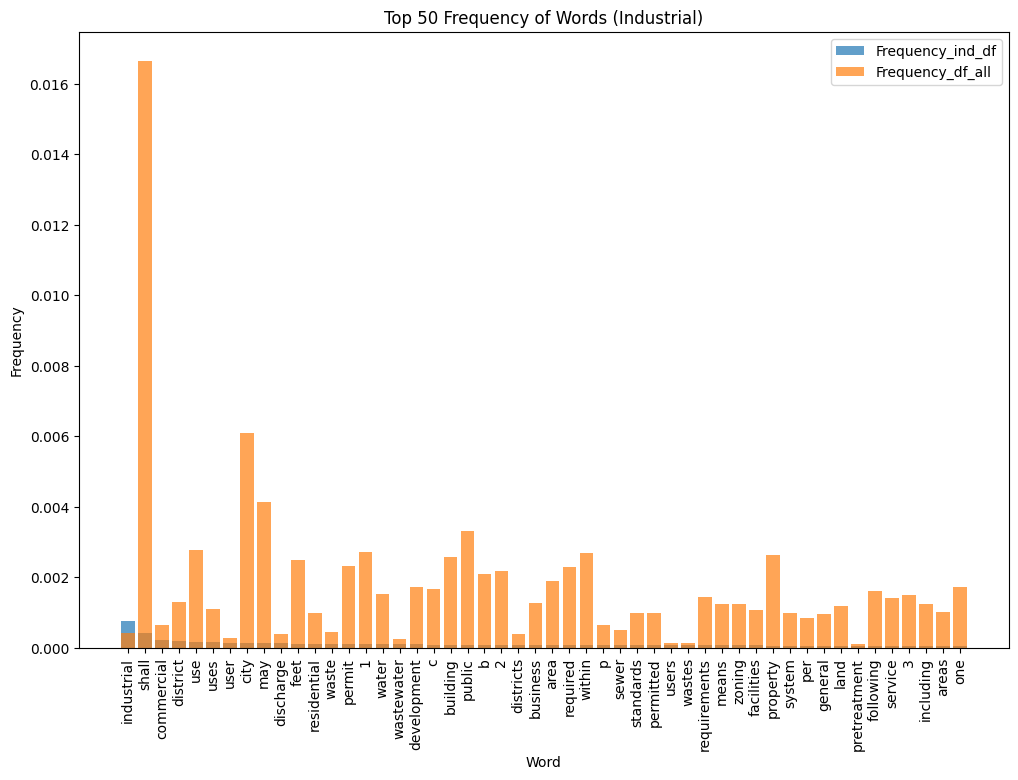

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
sorted_df = merged_df.sort_values(by="Frequency_ind_df", ascending=False)  # Sort in descending order

# Select top 50 rows
top_50_df = sorted_df.head(50)

# Convert Word column to string
top_50_df['Word'] = top_50_df['Word'].astype(str)

# Plot Frequency_df_all and Frequency_ind_df against Word for top 50 rows
plt.figure(figsize=(12, 8))
plt.bar(top_50_df['Word'], top_50_df['Frequency_ind_df'], label='Frequency_ind_df', alpha=0.7)
plt.bar(top_50_df['Word'], top_50_df['Frequency_df_all'], label='Frequency_df_all', alpha=0.7)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Frequency of Words (Industrial)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

C:\Users\clint\AppData\Local\Temp\ipykernel_5316\704849496.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_df['Word'] = top_50_df['Word'].astype(str)


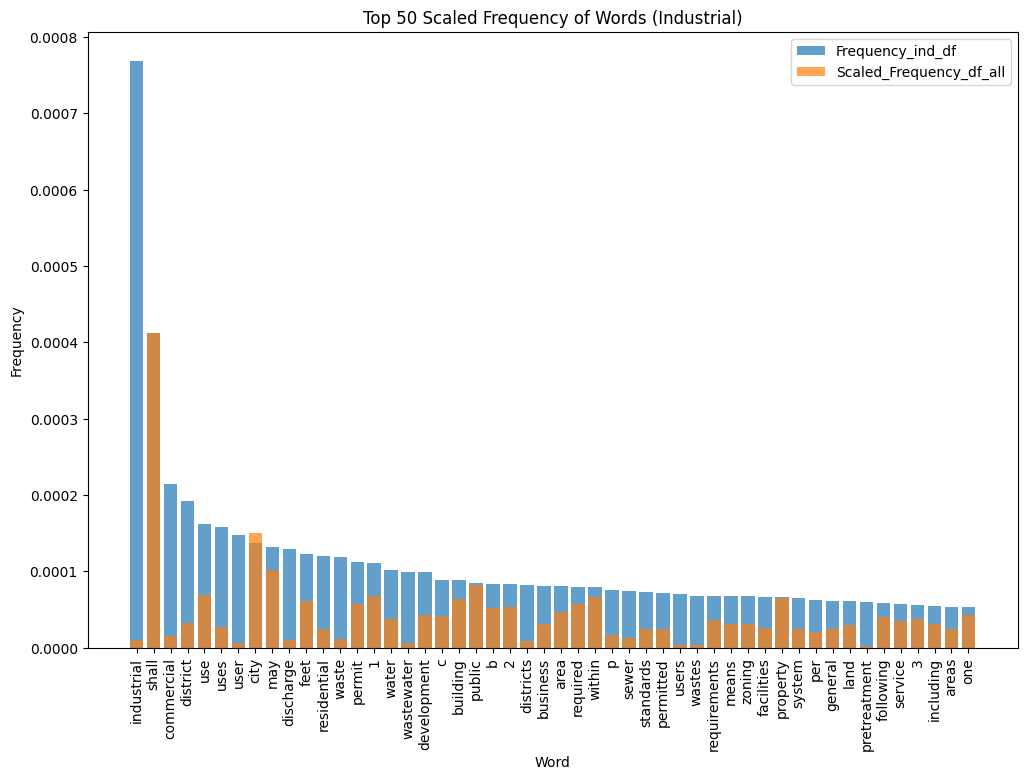

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
sorted_df = sorted_df.sort_values(by="Frequency_ind_df", ascending=False)  # Sort in descending order
sorted_df['Scaler'] = sorted_df['Frequency_df_all'] / sorted_df['Frequency_ind_df']
sorted_df
sorted_df['Scaled_Frequency_df_all'] = sorted_df['Frequency_df_all'] / 40.397923
sorted_df
# Select top 50 rows
top_50_df = sorted_df.head(50)

# Convert Word column to string
top_50_df['Word'] = top_50_df['Word'].astype(str)

# Plot Scaled_Frequency_df_all and Frequency_ind_df against Word for top 50 rows
plt.figure(figsize=(12, 8))
plt.bar(top_50_df['Word'], top_50_df['Frequency_ind_df'], label='Frequency_ind_df', alpha=0.7)
plt.bar(top_50_df['Word'], top_50_df['Scaled_Frequency_df_all'], label='Scaled_Frequency_df_all', alpha=0.7)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Scaled Frequency of Words (Industrial)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

C:\Users\clint\AppData\Local\Temp\ipykernel_5316\765678212.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_df['Word'] = top_50_df['Word'].astype(str)


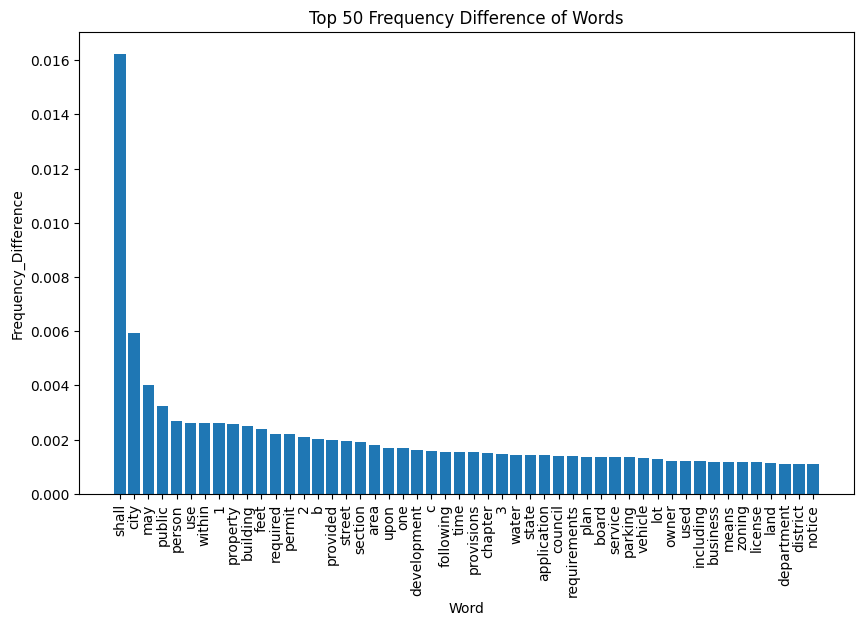

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
sorted_df = merged_df.sort_values(by="Frequency_Difference", ascending=False)  # Sort in descending order

# Select top 50 rows
top_50_df = sorted_df.head(50)

# Convert Word column to string
top_50_df['Word'] = top_50_df['Word'].astype(str)

# Plot Frequency_Difference against Word for top 50 rows
plt.figure(figsize=(10, 6))
plt.bar(top_50_df['Word'], top_50_df['Frequency_Difference'])
plt.xlabel('Word')
plt.ylabel('Frequency_Difference')
plt.title('Top 50 Frequency Difference of Words')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [104]:
import numpy as np



# Replace zero or negative values with a small positive value
sorted_df['Frequency_df_all'] = sorted_df['Frequency_df_all'].apply(lambda x: x if x > 0 else 1e-10)
sorted_df['Frequency_ind_df'] = sorted_df['Frequency_ind_df'].apply(lambda x: x if x > 0 else 1e-10)

# Compute the logarithm difference
log_diff = np.log(sorted_df['Frequency_df_all']) - np.log(sorted_df['Frequency_ind_df'])

# Store the result in a new column in sorted_df
merged_df['log_diff'] = log_diff

C:\Users\clint\AppData\Local\Temp\ipykernel_5316\707869725.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_df['Word'] = top_50_df['Word'].astype(str)


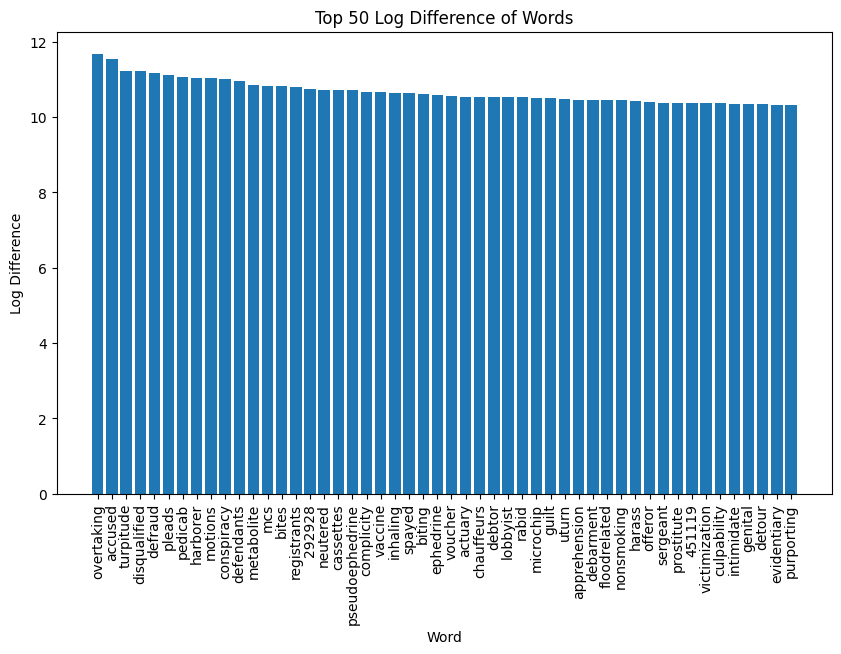

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
sorted_df = merged_df.sort_values(by="log_diff", ascending=False)  # Sort in descending order
sorted_df

# Select top 50 rows
top_50_df = sorted_df.head(50)

# Convert Word column to string
top_50_df['Word'] = top_50_df['Word'].astype(str)

# Plot log_diff against Word for top 50 rows
plt.figure(figsize=(10, 6))
plt.bar(top_50_df['Word'], top_50_df['log_diff'])
plt.xlabel('Word')
plt.ylabel('Log Difference')
plt.title('Top 50 Log Difference of Words')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [106]:
sorted_df

,Word,Frequency_df_all,Frequency_ind_df,Frequency_Difference,log_diff
1980752,overtaking,0.000012,0.000000e+00,1.187276e-05,11.684587
1348022,accused,0.000010,0.000000e+00,1.030966e-05,11.543421
2254237,turpitude,0.000008,0.000000e+00,7.590055e-06,11.237179
1590516,disqualified,0.000007,0.000000e+00,7.415251e-06,11.213879
1572179,defraud,0.000007,0.000000e+00,7.151778e-06,11.177701
...,...,...,...,...,...
2031626,pretrea,0.000000,1.165362e-07,-1.165362e-07,-7.060787
2031625,pretre,0.000000,1.190696e-07,-1.190696e-07,-7.082294
2031636,pretreatme,0.000000,1.317366e-07,-1.317366e-07,-7.183390
1407054,astewater,0.000000,1.710043e-07,-1.710043e-07,-7.444274


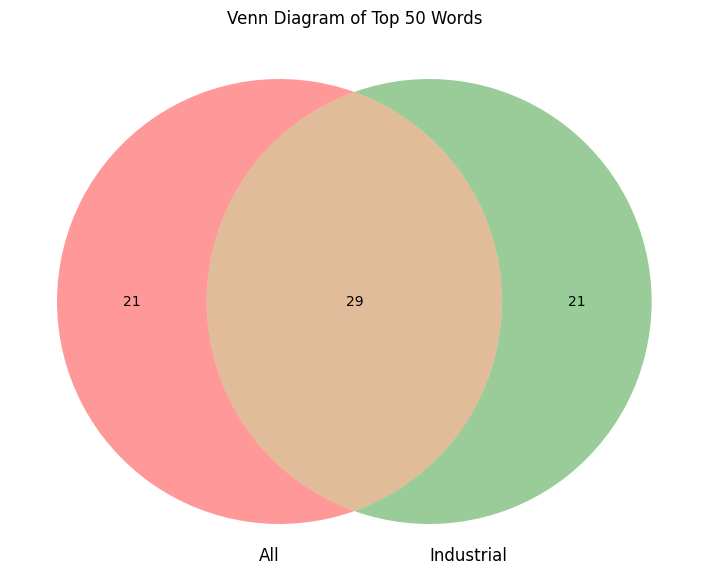

In [109]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Assuming sorted_df is your DataFrame
# Extract the top 50 words from both columns
top_50_all = sorted_df.sort_values(by='Frequency_df_all', ascending=False).head(50)['Word']
top_50_ind = sorted_df.sort_values(by='Frequency_ind_df', ascending=False).head(50)['Word']

# Convert to sets
set_all = set(top_50_all)
set_ind = set(top_50_ind)

# Create the Venn diagram
plt.figure(figsize=(10, 7))
venn2([set_all, set_ind], ('All', 'Industrial'))
plt.title('Venn Diagram of Top 50 Words')
plt.show()

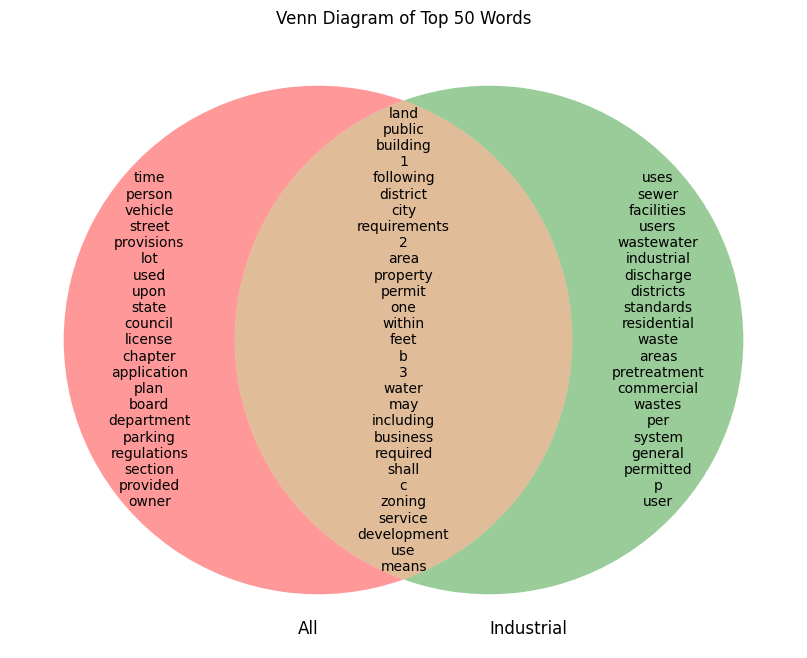

In [112]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Assuming sorted_df is your DataFrame
# Extract the top 50 words from both columns
top_50_all = sorted_df.sort_values(by='Frequency_df_all', ascending=False).head(50)['Word']
top_50_ind = sorted_df.sort_values(by='Frequency_ind_df', ascending=False).head(50)['Word']

# Convert to sets
set_all = set(top_50_all)
set_ind = set(top_50_ind)

# Create the Venn diagram
plt.figure(figsize=(12, 8))
venn = venn2([set_all, set_ind], ('All', 'Industrial'))
plt.title('Venn Diagram of Top 50 Words')

# Extract the words in each section
only_all = set_all - set_ind
only_ind = set_ind - set_all
both = set_all & set_ind

# Annotate the Venn diagram with the words
def annotate_venn(venn, only_all, only_ind, both):
    venn.get_label_by_id('10').set_text('\n'.join(only_all))
    venn.get_label_by_id('01').set_text('\n'.join(only_ind))
    venn.get_label_by_id('11').set_text('\n'.join(both))

annotate_venn(venn, only_all, only_ind, both)

plt.show()